<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Объединение данных</a></span></li><li><span><a href="#Преобразование-данных" data-toc-modified-id="Преобразование-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Преобразование данных</a></span></li><li><span><a href="#Обработка-пропущенных-наблюдений" data-toc-modified-id="Обработка-пропущенных-наблюдений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обработка пропущенных наблюдений</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li><li><span><a href="#Подготовка-данных-к-моделированию" data-toc-modified-id="Подготовка-данных-к-моделированию-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка данных к моделированию</a></span><ul class="toc-item"><li><span><a href="#Деление-данных-на-выборки" data-toc-modified-id="Деление-данных-на-выборки-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Деление данных на выборки</a></span></li><li><span><a href="#Кодирование-переменных" data-toc-modified-id="Кодирование-переменных-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Кодирование переменных</a></span></li></ul></li><li><span><a href="#Моделирование-оттока" data-toc-modified-id="Моделирование-оттока-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Моделирование оттока</a></span><ul class="toc-item"><li><span><a href="#Подбор-оптимальной-модели-по-CV" data-toc-modified-id="Подбор-оптимальной-модели-по-CV-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Подбор оптимальной модели по CV</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоговые выводы</a></span></li><li><span><a href="#Отчет" data-toc-modified-id="Отчет-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Отчет</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#расположение нескольких сводных таблиц рядом

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Прогнозирование оттока клиентов

План проекта:
1. Описание проекта
2. Описание данных
3. Предобработка данных
    1. Объединение данных
    2. Преобразование данных
    3. Обработка пропущенных наблюдений
4. Исследовательский анализ
5. Подготовка данных к моделированию
    1. Деление данных на выборки
    2. Кодирование переменных
6. Моделирование оттока
    1. Подбор оптимальной модели по CV
    2. Проверка лучшей модели на тестовой выборке
7. Итоговые выводы

## Описание проекта

**Заказчик** - оператор связи «Ниединогоразрыва.ком». Он планирует запустить программу, которая будет предлагать промокоды и специальные услуги тем клиентам, которые планируют уйти. Для этого им необходима модель, которая сможет прогнозировать отток клиентов.


**Исходные данные** - обезличенные данные о некоторых клиентах, информацию об их тарифах и договорах.

Данные состоят из файлов, полученных из разных источников:
- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.


Оператор предоставляет два основных типа услуг: 
1. Стационарную телефонную связь с дополнительной возможностью подключения телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:
- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

Информация о договорах актуальна на 1 февраля 2020.

Исходные данные содержат следующие столбцы:
- `customerID` - код клиента,
- `BeginDate` – дата начала пользования услугами,
- `EndDate` – дата окончания пользования услугами,
- `Type` – тип оплаты: ежемесячный, годовой и тд,
- `PaperlessBilling` – безналичный расчет,
- `PaymentMethod` – способ оплаты,
- `MonthlyCharges` – ежемесячные траты на услуги,
- `TotalCharges` – всего потрачено денег на услуги,
- `gender` – пол клиента,
- `Dependents` – наличие иждивенцев,
- `Senior Citizen` – наличие пенсионного статуса по возрасту,
- `Partner` – наличие супруга или супруги,
- `InternetService` – способ подключение интернета,
- `OnlineSecurity` –  наличие возможности блокировки небезопасных сайтов,
- `OnlineBackup` –  наличие облачного хранилища файлов,
- `DeviceProtection` –  наличие антивируса,
- `TechSupport` –  наличие выделенной линии технической поддержки,
- `StreamingTV` –  наличие стримингового телевидения,
- `StreamingMovies` –  наличие каталога фильмов,
- `MultipleLines` – наличие возможности ведения параллельных линий.

## Описание данных

Начнем работу над проектом с загрузки исходных данных.

In [5]:
try:
    df_contract = pd.read_csv('contract.csv')
    df_personal = pd.read_csv('personal.csv')
    df_internet = pd.read_csv('internet.csv')
    df_phone = pd.read_csv('phone.csv')
except:
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

Выведем основную информацию об исходных датафреймах, а также несколько первых строк каждой из таблиц. 

In [6]:
count = 0
for data in [df_contract, df_personal, df_internet, df_phone]:
    name = ['df_contract', 'df_personal', 'df_internet', 'df_phone']
    print(f'Инфографика по данным из таблицы {name[count]}')
    display(data.info())
    display(data.head())
    print()
    count += 1

Инфографика по данным из таблицы df_contract
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



Инфографика по данным из таблицы df_personal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Инфографика по данным из таблицы df_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Инфографика по данным из таблицы df_phone
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Рассмотрим каждый из датафреймов по отдельности.

Начнем с данных, содержащих **информацию о договорах**. Датафрейм включает в себя чуть больше 7 тыс. наблюдений. Переменных с пропущенными наблюдениями не наблюдается. Почти все переменные имеют тип `object`, за исключением месячных платежей, которые имеют тип `int`. Для оптимизации дальнейшей работы нам стоит преобразовать тип некоторых переменных:
- Привести переменные `BeginDate` и `EndDate` к типу datetime. Это позволит легче вычленять дополнительную информацию из дат;
- Привести переменную `TotalCharges` к численному типу.

На текущий момент аномальных значений в данных не наблюдается.

Перейдем к **персональным данным клиентов**. Датафрейм также состоит из почти 7 тыс. наблюдений без пропусков. Все переменные, за исключением наличия пенсионного статуса с типом `int`, имеют тип `object`. Аномальный значений также на текущий момент не наблюдается.

Датафрейм с **информацией об интернет-услугах** состоит из около 5,5 тыс. наблюдений без пропусков. Все переменные имеют тип `object`. Аномальных значений не наблюдается. 

Наконец, последняя таблица с **информацией об услугах телефонии** насчитывает 6,3 тыс. наблюдений без пропусков. Все переменные имеют тип `object`. Аномальных значений также не наблюдается. 

Перейдем к более детальному анализу датафреймов на потенциальные аномальные значения. Выведем уникальные значения каждой из переменных по всем таблицам.

In [7]:
print('Уникальные значения переменных из таблицы df_contract')
for name in ['Type', 'PaperlessBilling', 'PaymentMethod']:
    print(f'{name}:') 
    print(df_contract[name].unique())
print('TotalCharges:')
print(sorted(df_contract['TotalCharges'].unique())[0:10])
# для упрощения восприятия будет выведено только 10 первых уникальных значений переменной TotalCharges
print()

name = ['df_personal', 'df_internet', 'df_phone']
count = 0

for df in [df_personal, df_internet, df_phone]:
    print(f'Уникальные значения переменных из таблицы {name[count]}')
    col = df.columns.tolist()
    element = col.pop(0)
    for col_name in col:
        print(f'{col_name}:',)
        print(df[col_name].unique())
    count += 1
    print()

Уникальные значения переменных из таблицы df_contract
Type:
['Month-to-month' 'One year' 'Two year']
PaperlessBilling:
['Yes' 'No']
PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:
[' ', '100.2', '100.25', '100.35', '100.4', '100.8', '100.9', '1001.2', '1001.5', '1003.05']

Уникальные значения переменных из таблицы df_personal
gender:
['Female' 'Male']
SeniorCitizen:
[0 1]
Partner:
['Yes' 'No']
Dependents:
['No' 'Yes']

Уникальные значения переменных из таблицы df_internet
InternetService:
['DSL' 'Fiber optic']
OnlineSecurity:
['No' 'Yes']
OnlineBackup:
['Yes' 'No']
DeviceProtection:
['No' 'Yes']
TechSupport:
['No' 'Yes']
StreamingTV:
['No' 'Yes']
StreamingMovies:
['No' 'Yes']

Уникальные значения переменных из таблицы df_phone
MultipleLines:
['No' 'Yes']



Теперь можно заметить нетипичное значение ' ' в переменной TotalCharges. Необходимо будет дополнительно изучить подобную аномалию и дополнительно подобрать наиболее оптимальный способ решения. 

В остальных переменных аномалий не наблюдается.

Совершим несколько первичных преобразований для выполнения дальнейшего анализа. 

Для начала сменим тип данных у дат заключения и расторжения контрактов в датафрейме о контрактах клиентов. Дополнительно поменяем `No` в столбце с датами расторжения контрактов на дату выгрузки. Такое решение позволит нам при преобразовании не получить пропуски, а также упростит дальнейшие вычисления.

In [8]:
df_contract.loc[df_contract['EndDate'] == 'No', 'EndDate'] = '2020-02-01'

In [9]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], format = '%Y-%m-%d')

In [10]:
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'], format = '%Y-%m-%d')

Дополнительно изучим наблюдения, которые имеют аномальное значение в переменной суммарных выплат. 

In [11]:
df_contract[df_contract['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,


Как можно заметить, все эти наблюдения имеют еще одну общую черту - дату заключения договора, которая совпадает с датой выгрузки данных. Таким образом, можно заключить, что это новые пользователи, которые еще не успели накопить платежи. В таком случае допустимо будет заменить аномальные значения на размер ежемесячного платежа - предполагаем, что оплата производится за месяц вперед. 

Также дополнительно не забудем перевести данную переменную к численному типу.

In [12]:
df_contract.loc[df_contract['TotalCharges']== ' ', 'TotalCharges'] = df_contract['MonthlyCharges']

In [13]:
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype('float')

Проверим, что все совершенные нами преобразовани над данными прошли успешно. Вновь выведем информацию о датафрейме, в котором мы проводили преобразования. 

In [14]:
df_contract.head()
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


Также дополнительно проверим, что нет нарушений в датах - нет договоров, которые бы заключались после даты расторжения.

In [15]:
df_contract.query('BeginDate > EndDate')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


Таких нарушений нет. Дополнительную работу над данными проводить не нужно. 

Перейдем к исследованию исходных данных. Для начала выведем дескриптивную статистику численных небинарных переменных. 

In [16]:
df_contract.describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.798992
std,30.090047,2266.730170
min,18.250000,18.800000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


Разброс обоих переменных довольно велик - об этом может судить по относительно высокому значению показателя стандартного отклонения. Месячные выплаты распределены примерно равномерно относительно медианного значения - среднее по выборке довольно близко к медианному. В то же время суммарные выплаты имеют смещение, о чем можно судить по превышению среднего значения медианного. Максимальные и минимальные значения в разумных пределах.

Перейдем к визуальному анализу численных переменных. Построим графики распределения таких переменных. 

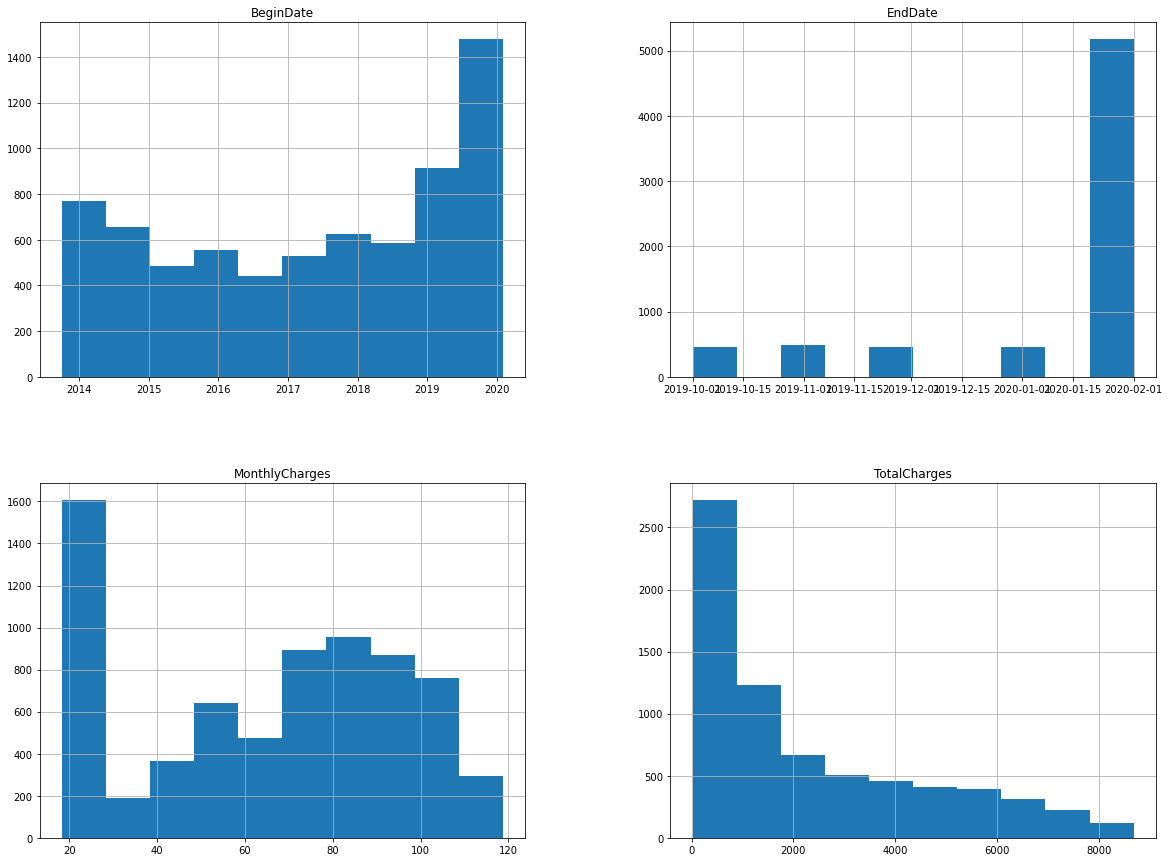

In [17]:
df_contract.hist(figsize=(20,15))
plt.show()

Начнем с анализа распределения лет. Первые три года наблюдалось снижение числа новых клиентов, после чего в последующие три года заметен более существенный рост, достигший своего пика непосредственно в последний год. 

С распределением разорванных контрактов все не так просто. Первые разорванные контракты появились только в 2019 году, в то время как в данных самым ранним годом заключения числится 2014. Возможно, в выборку просто не попали те клиенты, которые разрывали свои контракты в более ранние года, однако без дополнительно информации от заказчика будет затруднительно определить причину возникновения такой странности. В то же время наибольшее число разорванных контрактов также пришлось на последний год, что может объяснить причину возникшего у компании интереса к определению потенциально уходящих клиентов с целью их дальнейшего удержания.

Визуально месячные выплаты распределены не очень равномерно. Превалирует группа клиентов с невысокими месячными выплатами. За исключением этой группы, остальные наблюдения имеют распределение куда более близкое к нормальному. 

Суммарные выплаты экспоненциально уменьшаются с увеличением размера суммы выплат. Это довольно логично, учитывая, что в месячных выплатах также доминируют небольшие размеры выплат.

Перейдем к анализу будущих категориальных переменных. Рассмотрим, какие группы превалируют у каждой из переменных.

Начнем с рассмотрения таблицы с данными о контрактах.

In [18]:
contract_type = df_contract.pivot_table(index='Type', values=['customerID'], aggfunc='count')
contract_billing = df_contract.pivot_table(index='PaperlessBilling', values=['customerID'], aggfunc='count')
contract_paymetod = df_contract.pivot_table(index='PaymentMethod', values=['customerID'], aggfunc='count')
display_side_by_side(contract_billing, contract_type, contract_paymetod)

,customerID
PaperlessBilling,
No,2872
Yes,4171
,customerID
Type,
Month-to-month,3875
One year,1473
Two year,1695
,customerID
PaymentMethod,


Большинство пользователей предпочитают безналичный расчет. Это довольно логично, поскольку современное развитие технологий существенно упрощают процесс оплаты онлайн. 

Тип оплаты преимущественно помесячный. На таких пользователей компании стоит обратить большее внимание - именно им проще в любой момент расторгнуть контракт, поскольку они не связаны долгосрочными обязательствами.

Наиболее популярным способом оплаты является электронный чек. 

Перейдем к анализу информации о клиентах.

In [19]:
personal_gender = df_personal.pivot_table(index='gender', values=['customerID'], aggfunc='count')
personal_cityzen = df_personal.pivot_table(index='SeniorCitizen', values=['customerID'], aggfunc='count')
personal_partner = df_personal.pivot_table(index='Partner', values=['customerID'], aggfunc='count')
personal_dependents = df_personal.pivot_table(index='Dependents', values=['customerID'], aggfunc='count')

display_side_by_side(personal_gender, personal_cityzen, personal_partner, personal_dependents)

,customerID
gender,
Female,3488
Male,3555
,customerID
SeniorCitizen,
0,5901
1,1142
,customerID
Partner,
No,3641


По гендору клиенты распределены примерно равномерно с совсем малым перевесом в сторону мужчин.

Большинство пользователей не имеют статуса пенсионера. Это также логично, поскольку старшее поколение заинтересовано в меньшем количестве услуг, предлагаемых заказчиком.

Пользователи с партнерами и без также распределены примерно одинаково с небольшим перевесом в сторону клиентов без партнеров.

Подавляющее большинство клиентов не имеют иждивенцев на попечении. При текущем уровне анализа несколько затруднительно предполагать, как именно будет влиять данное смещения как на целевую переменную, так и на другие переменные.

Теперь разберем переменные из набора данных об интернет услугах.

In [20]:
internet_intservice = df_internet.pivot_table(index='InternetService', values=['customerID'], aggfunc='count')
internet_security = df_internet.pivot_table(index='OnlineSecurity', values=['customerID'], aggfunc='count')
internet_backup = df_internet.pivot_table(index='OnlineBackup', values=['customerID'], aggfunc='count')
internet_protection = df_internet.pivot_table(index='DeviceProtection', values=['customerID'], aggfunc='count')
internet_suport = df_internet.pivot_table(index='TechSupport', values=['customerID'], aggfunc='count')
internet_tv = df_internet.pivot_table(index='StreamingTV', values=['customerID'], aggfunc='count')
internet_movies = df_internet.pivot_table(index='StreamingMovies', values=['customerID'], aggfunc='count')

display_side_by_side(internet_intservice, internet_security, internet_backup, internet_protection, internet_suport,
                     internet_tv, internet_movies)

,customerID
InternetService,
DSL,2421
Fiber optic,3096
,customerID
OnlineSecurity,
No,3498
Yes,2019
,customerID
OnlineBackup,
No,3088


Прежде всего, стоит помнить про то, что не все пользователи, состоящие в наборе данных о контрактах, также присутствуют в текущем наборе данных, так что после объединения таблиц выводы могут несколько поменяться.

Пользователи предпочитают подключать интернет через оптоволоконный кабель.

В наличии приложений по интернет-безопасности пользователи менее заинтересованы, чем в его наличии. В то же время, клиенты более заинтересованы в антивирусе, чем в блокировке небезопасных сайтов.

Клиенты в большинстве своем отказываются от выделенной линии технической поддержки. Вероятно, пользователи не так часто сталкиваются с проблемами и готовы подождать в очереди в случае их возникновения.

Также пользователи преимущественно не заинтересованные в наличие дополнительно облачного хранилища файлов для резервного копирования данных. Возможно, они предпочитают альтернативные способы хранения данных.

Наконец, перейдем к стриминговому блоку. В целом, пользователи примерно в равной мере заинтересованы и не заинтересованы в стриминговых видах услуг, однако разрыв в группах более существенен относительно стримингово телевидения.

И в завершении рассмотрим данные об услугах телефонии.

In [21]:
phone_lines = df_phone.pivot_table(index='MultipleLines', values=['customerID'], aggfunc='count')
phone_lines

,customerID
MultipleLines,
No,3390
Yes,2971


Большинство пользователей, пользующиеся услугами телефонии, не заинтересованы в подключении дополнительной возможности подключения телефонного аппарата к нескольким линиям одновременно.

Итак, нами была проведена работа по первичному анализу исходных данных. Мы оценили, с какими данными нам предстоит работать, а также какие в них присутствуют особенности. Благодаря этому нам удалось составить более подробный предварительный план работы над данным проектом. 

## Предобработка данных

### Объединение данных

Начнем этап предобработки данных с объединения всех исходных датафреймов в одну таблицу - это значительно упростит дальнейшую работу над данными.

In [22]:
df_full = df_contract.merge(df_personal, on='customerID', how='left')
df_full = df_full.merge(df_internet, on='customerID', how='left')
df_full = df_full.merge(df_phone, on='customerID', how='left')

Посмотрим на получившийся итоговый датасет.

In [23]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

Объединение прошло успешно. Мы не потеряли ни переменные, ни наблюдения. Типы переменных остались прежними. Можно переходить к дальнейшей обработке.

Также для удобства дальнейшей работы переведем названия всех столбцов к змеиному регистру.

In [24]:
df_full.columns = ['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method', 
                   'monthly_charges', 'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents', 
                   'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 
                   'streaming_tv', 'streaming_movies', 'multiple_lines']

In [25]:
df_full.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Первый этап предобработки завершен. Переходим к непосредственному преобразованию самих данных.

### Преобразование данных

Преобразование данных мы начнем с создания переменной-таргета. Согласно заданию заказчика нам необходимо определить, разорвет ли клиент контракт или нет. Перед нами стоит задача классификации, в которой за единицу мы примем наступление ключевого события - разрыв контракта. Соответственно, значение таргета, равное 0, получат те пользователи, которые на момент выгрузки данных продолжили пользоваться услугами заказчика.

In [26]:
df_full['target'] = 0
df_full.loc[df_full['end_date'] != '2020-02-01', 'target'] = 1

Теперь перейдем к работе с датами. В исходном виде использовать такие переменные будет затруднительно. Посчитаем количество дней лояльности для каждого клиента, основываясь на датах заключения и разрыва контракте. Напомним, что для тех клиентов, которые остались лояльны заказчику на момент выгрузки данных, мы установили датой разрыва контракте дату выгрузки данных.

Не забудем привести рассчитываемую величину к численному типу. 

In [27]:
df_full['full_days'] = df_full['end_date'] - df_full['begin_date']

df_full['full_days'] = df_full['full_days'].dt.days

Также создадим дополнительную переменную, которая будет отвечать на вопрос, пользуется ли клиент услугами связи в целом или нет. Для чего нам может понадобиться такая переменная? При заполнении пропусков мы сможем выделить тех клиентов, которые пользуются направлением интернета, но не пользуются какой-то конкретной услугой, от тех клиентов, которые в целом не пользуются интернетом, при помощи переменной `internet_service` (вторая группа клиентов будет иметь здесь значение `No`). В то же время на текущий момент не существует аналогичной переменной для направления телефонии - в переменной `multiple_lines` ответом `No` определяются клиенты с мобильной связью, но без мультилиний. 

In [28]:
df_full['phone_using'] = 'No'
df_full.loc[df_full['multiple_lines'].isna() == False, 'phone_using'] = 'Yes'

Наконец, удалим более не нужные переменные, а именно даты заключения и расторжения контрактов. Мы уже получили из этих переменных наиболее важную информацию, а их дальнейшее нахождение в таблице может значительно ухудшить качество моделей из-за наличия связанных переменных. 

После удаления переменных вновь выведем наши данные чтобы убедиться, что все преобразования в даном блоке прошли успешно. 

In [29]:
del df_full['begin_date']
del df_full['end_date']

In [30]:
df_full.head()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target,full_days,phone_using
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,...,No,Yes,No,No,No,No,NaN,0,31,No
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,...,Yes,No,Yes,No,No,No,No,0,1036,Yes
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,...,Yes,Yes,No,No,No,No,No,1,61,Yes
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,...,Yes,No,Yes,Yes,No,No,NaN,0,1371,No
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,...,No,No,No,No,No,No,No,1,61,Yes


Блок преобразование данных завешен. В рамках данного блока мы подготовили таргет для этапа моделирования, а также вычленили из дат общее число дней, в течении которых клиенты пользовались услугами заказчика. 

Переходим к следующему блоку.

### Обработка пропущенных наблюдений

Для начала выведем информацию о пропусках в данных в абсолютных и процентных выражениях. 

In [31]:
df_full.isna().sum()

customer_id             0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
target                  0
full_days               0
phone_using             0
dtype: int64

In [32]:
for name in df_full.columns:
    print(f'Доля пропусков в столбце {name}:', '%.3f' % df_full[name].isna().mean())

Доля пропусков в столбце customer_id: 0.000
Доля пропусков в столбце type: 0.000
Доля пропусков в столбце paperless_billing: 0.000
Доля пропусков в столбце payment_method: 0.000
Доля пропусков в столбце monthly_charges: 0.000
Доля пропусков в столбце total_charges: 0.000
Доля пропусков в столбце gender: 0.000
Доля пропусков в столбце senior_citizen: 0.000
Доля пропусков в столбце partner: 0.000
Доля пропусков в столбце dependents: 0.000
Доля пропусков в столбце internet_service: 0.217
Доля пропусков в столбце online_security: 0.217
Доля пропусков в столбце online_backup: 0.217
Доля пропусков в столбце device_protection: 0.217
Доля пропусков в столбце tech_support: 0.217
Доля пропусков в столбце streaming_tv: 0.217
Доля пропусков в столбце streaming_movies: 0.217
Доля пропусков в столбце multiple_lines: 0.097
Доля пропусков в столбце target: 0.000
Доля пропусков в столбце full_days: 0.000
Доля пропусков в столбце phone_using: 0.000


Напомним, что информация об услугах интернета и телефонии была получена из соответствующих таблиц. В данные таблицы попали только те пользователи, которые пользовались услугами интернета или телефонной связи. Соответственно, возникшие пропуски объясняются тем, что некоторые пользователи не использовали одно из направлений. В таком случае допустимо заменить пропуски на значение `No` - в таком случае они останутся отдельной категорией там, где это более важно (в переменной `internet_service`, например), а в остальных случаях будут приравниваться к тем клиентам, которые не пользуются конкретной услугой. 

После этого убедимся, что пропусков в общих данных не осталось.

In [33]:
df_full = df_full.fillna('No')

In [34]:
df_full.isna().sum()

customer_id          0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
target               0
full_days            0
phone_using          0
dtype: int64

Заполнение пропусков прошло успешно. На этом мы закачиваем как блок обработки пропусков, так и этап предобработки данных.

В ходе работы над данным этапом мы:
1. Объединили все исходные данные в одну итоговую таблицу;
2. Сформировали несколько значимых переменных, в том числе вычленили из исходных данных таргет;
3. Обработали возникшие в результате объединения датафреймов пропуски.

## Исследовательский анализ

Переходим к следующему этапу работы на данным проектом - более подробному исследовательскому анализу.

Данный анализ мы начнем с изучения таргета. Рассмотрим, как распределено число клиентов, расторгнувших и не расторгнувших контракт за рассматриваемый период.

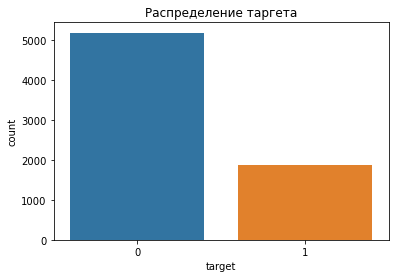

In [35]:
sns.countplot(data=df_full, x='target')
plt.title('Распределение таргета')
plt.show()

Типы клиентов распределены неравномерно - присутствует перевес в сторону клиентов, которые на конец рассматриваемого периода не расторгли контракт с заказчиком. Нам будет необходимо учесть данную особенность при делении выборки, а также на этапе моделирования.

Теперь рассмотрим, как распределились типы клиентов для каждой из переменных. Для категориальных переменных мы изучим непосредственное разделение на сами категории, а для непрерывных переменных - оценим разницу между медианными значениями двух групп таргета. 

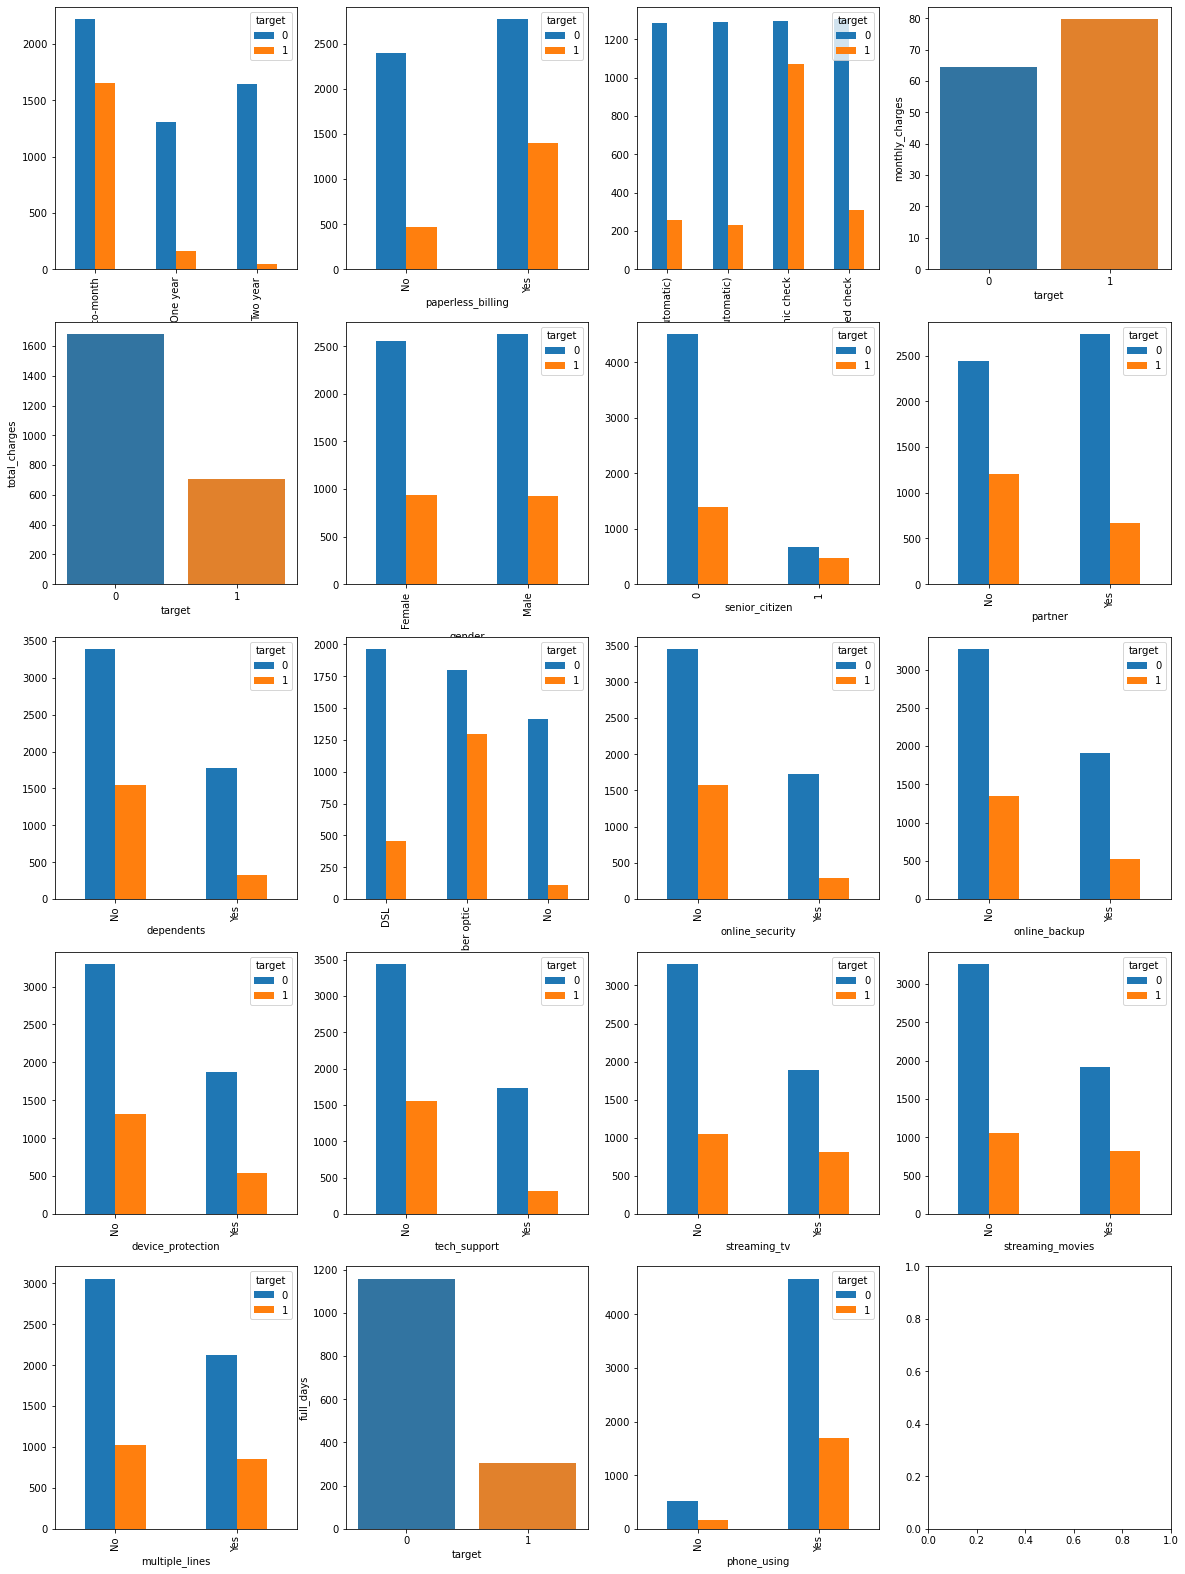

In [36]:
col = df_full.columns.tolist()
for name in ['customer_id', 'target']:
    col.remove(name)

central = df_full.groupby('target').median().reset_index()

fig, ax = plt.subplots(5, 4, figsize=(20,28))
ax = ax.ravel()
position = 0
for i in col:
    if i in ['monthly_charges', 'total_charges', 'full_days']:
        sns.barplot(data=central, x='target', y=i, ax=ax[position])
    else: df_full.pivot_table(index=i, columns = 'target', values='customer_id', aggfunc='count').plot(
        kind='bar', ax=ax[position])
    position += 1

Рассмотрим все переменные по порядку, акцентируя внимание на наиболее интересных случаях. 

**Тип оплаты.** Наибольшей популярностью у обеих групп клиентов пользуются контракты с помесячными выплатами. В то же время, доля клиентов, расторгнувших по итогу контракт, среди клиентов с годичными и двухгодичными контрактами невелика. Мы уже делали предположение о том, что клиентам легче разорвать контракт при помесячных выплатах и по итогу наше предположение оказалось верным - когда клиент не связан долгосрочным обязательством, ему проще запросить расторжение договора.

**Использование безналичного расчета.** Оставшиеся лояльными клиенты примерно в равной мере отдают предпочтение обоим типам платежей - присутствует небольшой перевес в сторону клиентов, отдающих предпочтение в сторону безналичных платежей. Если говорить непосредственно про клиентов, расторгнувших договор, то они также преимущественно отдавали свое предпочтение безналичным платежам.

**Способ оплаты.** Клиенты с договорами на конец рассматриваемого периода примерно в равной степени предпочитают каждый из способов оплаты. Куда более интересна ситуация у клиентов с расторгнутыми контрактами. Чаще всего такие клиенты отдают свое предпочтение оплате при помощи электронного чека. Остальные же способы оплаты также распределены между ними примерно	в равной степени.

**Ежемесячные выплаты.** Медианные ежемесячные выплаты примерно равны между обеими группами клиентов с некоторым перевесом в сторону клиентов, расторгнувших свои договора. Возможно, они решают поменять компанию как раз в надежде снизить сумму ежемесячных платежей.

**Суммарные выплаты.** Здесь заметен явный перевес по медианным выплатам в сторону более лояльных клиентов. Это довольно логично - клиенты, которые уже относительно давно пользуются услугами заказчика, будут иметь большую сумму суммарных платежей. Такие клиенты уже привыкли к заказчику и менее заинтересованы в переходе по сравнению с новичками.


**Пол клиента.** Существенных различий как между гендерами, так и между группами клиентов не наблюдается.

**Наличие пенсионного статуса.** Клиентов с таким статусом немного в обеих группах клиентов, однако среди тех, у кого он присутствует, доля расторгнувших договор куда выше.

**Наличие партнера.** Среди лояльных клиентов разница между количеством клиентов с и без партнера невелика. Расторгнувшие клиенты в большинстве своем партнера не имеют.

**Наличие иждивенцев.** Подавляющее число клиентов в обеих категориях не имеют иждивенцев на попечении.


**Тип подключения к интернету.** Лояльные клиенты примерно в равной степени отдают свое предпочтение обоим типам подключения, а вот группа клиентов не пользующихся направлением услуг интернета несколько меньше. Среди клиентов, расторгнувших свои договора, превалирует группа, отдающая предпочтение оптическому волокну.

**Наличие блокировки небезопасных сайтов, облачного хранилища файлов, антивируса и выделенной линии технической поддержки.** Данные переменные распределены примерно одинаково, поэтому допустимо дать для них обобщенное описание. Клиенты обеих групп предпочитают не подключать данные виды услуг. В то же время, именно среди таких клиентов выше доля разорвавших контракт.

**Наличие стримингового телевидения, каталога фильмов и возможности ведения параллельных линий.** Во всех этих категориях также превалируют более лояльные клиенты, однако доли клиентов с расторгнутыми контрактами в рамках каждой из категорий примерно равны.

Наконец, в завершении рассмотрим корреляцию между всеми переменными. Для этого мы рассмотрим 𝜙k (Phik) корреляцию - именно она позволит нам одновременно рассмотреть как порядковые, так и непрерывные переменные.

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'senior_citizen', 'target', 'full_days']


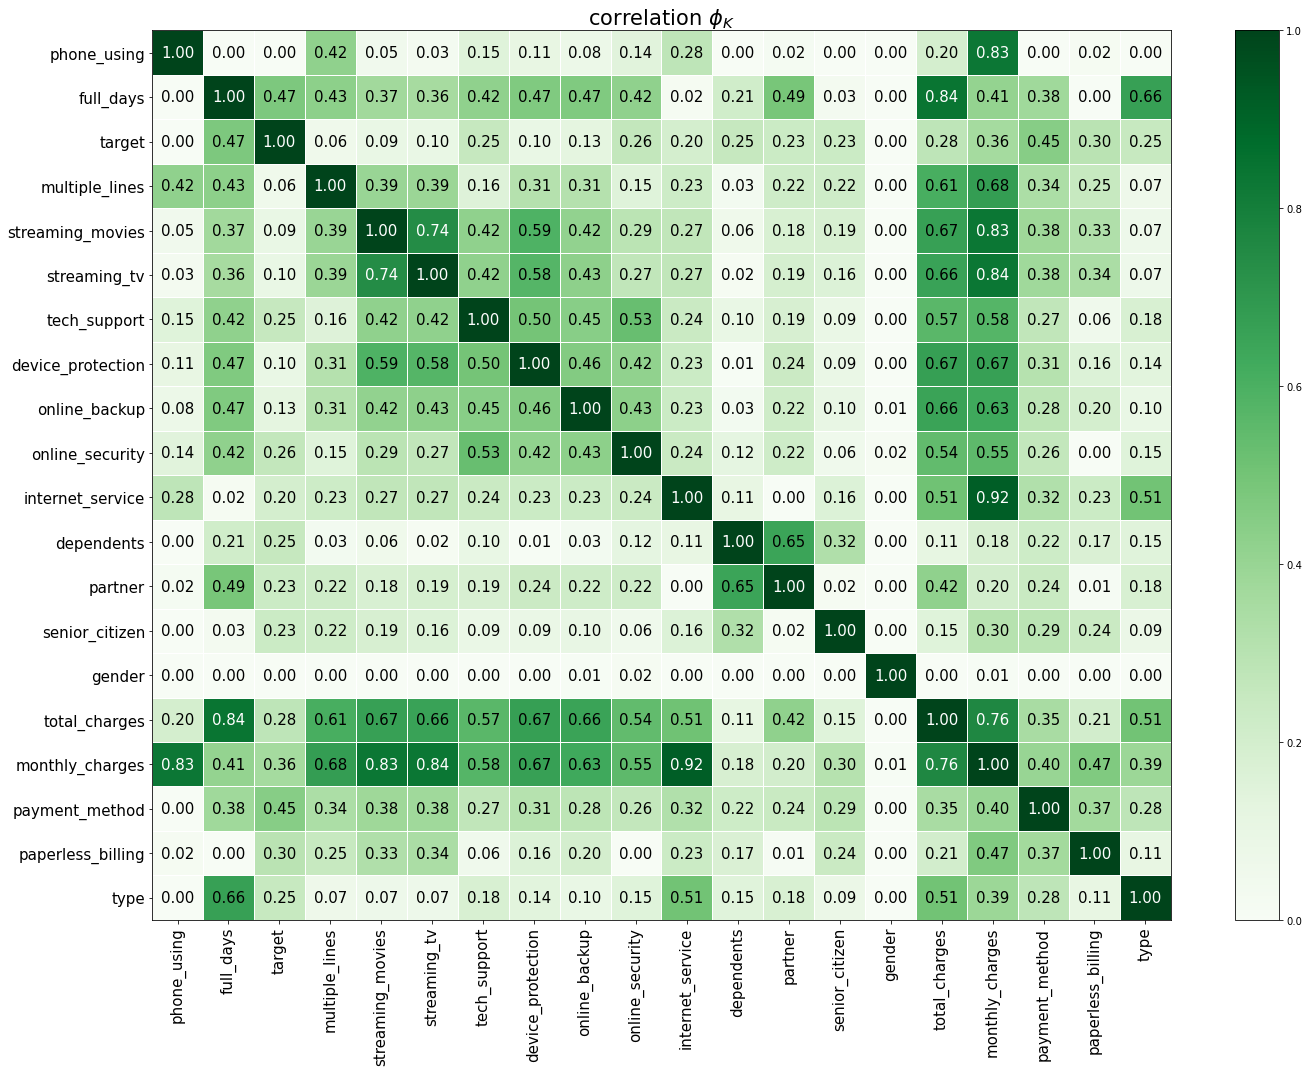

In [37]:
df = df_full.copy().set_index("customer_id")
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20,15))
plt.tight_layout()

Что интересного можно заметить по получившемуся результату? Прежде всего, обратим наше внимание на переменную таргета. Наиболее сильную связь он имеет со следующими переменными - общее число дней существования договора, размер ежемесячного платежа и типом оплаты. На этапе моделирования именно данные переменные могут оказаться наиболее значимыми.

Довольно велика корреляция между видами услуг и выплатами - как ежемесячными, так и суммарными. Это логично, поскольку именно услуги формируют размер выплат, которые придется совершить клиенту.

Также стоит выделить наличие связи между суммарными выплатами и переменными, отвечающие за размер ежемесячных выплат и общим числом дней. Это также логично, поскольку первые формируется из двух других. В таком случае, чтобы не оставлять высокую зависимость среди переменных, а также не потерять существенную информацию, нами было принято решение исключить суммарные выплаты из итогового набора данных.

На этом мы завершаем этап исследовательского анализа и переходим непосредственно к этапу моделирования. 

## Подготовка данных к моделированию

### Деление данных на выборки

Теперь, после всех основных преобразований и исследовательского анализа мы можем приступать к этапу моделирования. 

Начнем с подготовки выборок для обучения. Для начала поделим данные на переменные и таргет. Не забудем исключить из переменных сам таргет, идентификатор каждого пользователя и суммарные выплаты.

In [38]:
X = df_full.copy().drop(['target', 'customer_id', 'total_charges'], axis=1)
y = df_full['target'].copy()

Теперь поделим данные на тренировочные и тестовые. 

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                               test_size = 0.25,
                                               stratify = y,
                                               shuffle = True,
                                               random_state = 171022)

### Кодирование переменных

Также перед дальнейшим моделированием нам необходимо преобразовать текстовые переменные в классические категориальные, которые будут понятны для методов машинного обучения.

Для кодирования мы будем использовать One-Hot Encoder - в нашем случае это допустимо, поскольку мы имеем не так много категориальных переменных, а также самих категорий в переменных мало.

Обучим кодировщика тренировочных данных, после чего применим кодирование к тренировочным данным.

In [40]:
for name in ['monthly_charges', 'total_charges', 'full_days']:
    col.remove(name)

ohe_enc = OneHotEncoder(drop = 'first')

ohe_enc.fit(X_train[col])
new_columns = ohe_enc.get_feature_names(col)
X_train_ohe = pd.DataFrame(ohe_enc.transform(X_train[col]).toarray(), columns = new_columns).reset_index(drop=True)


In [41]:
X_train = X_train.reset_index(drop=True).join(X_train_ohe)

In [42]:
for name in col:
    del X_train[name]

In [43]:
X_train.head()

,monthly_charges,full_days,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_1,...,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes,phone_using_Yes
0,20.85,1371,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,19.80,2102,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,75.40,702,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,20.50,365,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,101.85,1217,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


Как можно заметить, преобразование переменных прошло успешно. Повторим процедуру кодирования для тренировочных данных.

In [44]:
X_test_ohe = pd.DataFrame(ohe_enc.transform(X_test[col]).toarray(), columns = new_columns).reset_index(drop=True)
X_test = X_test.reset_index(drop=True).join(X_test_ohe)

for name in col:
    del X_test[name]

Также дополнительно проведем операцию стандартизации для непрерывных переменных. Это необходимо, поскольку среди используемых нами далее переменных будут присутствовать чувствительные к масштабу признаков модели. Для остальных же моделей мы используем текущие данные, т.е. до операции стандартизации.

In [45]:
scaler = StandardScaler()
X_train_std = X_train.copy()
X_train_std[['monthly_charges', 'full_days']] = scaler.fit_transform(X_train_std[['monthly_charges', 'full_days']])

In [46]:
X_train_std.head()

,monthly_charges,full_days,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_1,...,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes,phone_using_Yes
0,-1.451305,0.499288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.486091,1.471011,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.355934,-0.390019,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.462900,-0.837995,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.232222,0.294574,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


Повторим проуедуру масштабирования для тестовых данных.

In [47]:
X_test_std = X_test.copy()
X_test_std[['monthly_charges', 'full_days']] = scaler.transform(X_test_std[['monthly_charges', 'full_days']])

Наконец можно перейти к непосредственному моделированию.

## Моделирование оттока

Всего нами будет рассмотрено 5 моделей: модель k-ближайщих соседей, случайный лес, LightGBM, модель CatBoost и XGBoost. Для каждой модели мы постараемся по кросс-валидации подобрать наиболее оптимальные параметры таким образом, чтобы максимизировать ключевой параметр - показатель ROC-AUC.

### Подбор оптимальной модели по CV

Начнем с модели k-ближайщих соседей.

In [48]:
knn = KNeighborsClassifier(n_jobs=-1)
params = {'n_neighbors': [1, 20], 'p': [1, 2], 'weights': ['uniform', 'distance'] }
knn_cv = GridSearchCV(knn, params, cv=5, scoring='roc_auc', n_jobs=-1)
knn_cv.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [1, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

Выведем получившийся на кросс-валидации при лучших параметрах критерий ROC-AUC.

In [49]:
knn_cv.best_score_

0.8298092642650119

In [50]:
knn = KNeighborsClassifier(n_jobs=-1, **knn_cv.best_params_)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=20)

Качество модели k-ближайщих соседей составляет 0.82, что является неплохим результатом. Однако пока нам рано делать итоговые выводы, поскольку это только первая из 5 моделей.

Перейдем к модели случайного леса.

In [51]:
forest = RandomForestClassifier(random_state=171022, n_jobs=-1, class_weight='balanced')
params_forest = {'max_depth': range (1, 12, 1), 'max_features': ['auto', 'sqrt', 'log2'], 
                 'n_estimators': range(50, 150, 10), 
                 'min_samples_split': [1, 15]}
forest_cv = GridSearchCV(forest, params_forest, cv=5, scoring='roc_auc', n_jobs=-1)
forest_cv.fit(X_train, y_train)

forest_cv.best_score_

0.8564313852535914

Модель случайного леса показала лучший результат качества по сравнению с моделью k-ближайщих соседей, что делает ее на текущий момент более перспективной моделью.

Дополнительно рассмотрим значимость признаков в получившейся модели. 

In [52]:
forest = RandomForestClassifier(random_state=171022, n_jobs=-1, class_weight='balanced', **forest_cv.best_params_)
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11,
                       min_samples_split=15, n_estimators=120, n_jobs=-1,
                       random_state=171022)

In [53]:
forest_importance = forest.feature_importances_
for i in range(len(forest_importance)):
    forest_importance[i] = round(forest_importance[i], 3)

dict(zip(X_train.columns, forest_importance))

{'monthly_charges': 0.129,
 'full_days': 0.265,
 'type_One year': 0.049,
 'type_Two year': 0.111,
 'paperless_billing_Yes': 0.022,
 'payment_method_Credit card (automatic)': 0.014,
 'payment_method_Electronic check': 0.05,
 'payment_method_Mailed check': 0.009,
 'gender_Male': 0.013,
 'senior_citizen_1': 0.015,
 'partner_Yes': 0.02,
 'dependents_Yes': 0.016,
 'internet_service_Fiber optic': 0.103,
 'internet_service_No': 0.046,
 'online_security_Yes': 0.028,
 'online_backup_Yes': 0.017,
 'device_protection_Yes': 0.012,
 'tech_support_Yes': 0.027,
 'streaming_tv_Yes': 0.014,
 'streaming_movies_Yes': 0.016,
 'multiple_lines_Yes': 0.014,
 'phone_using_Yes': 0.008}

Наиболее значимыми соласно модели случайного леса являются следующие признаки: общее число дней существования договора, размер ежемесячного платежа и критерий, заключил ли клиент двухлетний договор оплаты или нет. В целом, полученний результат оказался довольно ожидаем - именно эти три переменные имели наибольший уровень корреляции с таргетом и их значимость влияния на него довольно логична.

Теперь перейдем к следующей модели - LightGBM. Как и ранее начнем работу над моделью с подбора наиболее оптимальных параметров.

In [54]:
gbm = LGBMClassifier(random_state=171022, n_jobs=-1, class_weight='balanced')
params_gbm = {'max_depth': range (1, 12, 1), 'n_estimators': range(50, 150, 10),
              'boosting ': ['gbdt ', 'dart ', 'goss']}
gbm_cv = GridSearchCV(gbm, params_gbm, cv=5, scoring='roc_auc', n_jobs=-1)
gbm_cv.fit(X_train, y_train)

gbm_cv.best_score_

[LightGBM] [Warning] Unknown parameter: gbdt
[LightGBM] [Warning] boosting is set=, boosting_type=gbdt will be ignored. Current value: boosting=


0.8978813797504179

Качество итоговой модели LightGBM оказалось выше модели случайного леса. 

Также рассмотрим значимость признаков в итоговой модели. 

In [55]:
gbm = LGBMClassifier(random_state=171022, n_jobs=-1, class_weight='balanced', **gbm_cv.best_params_)
gbm.fit(X_train, y_train)

LGBMClassifier(boosting ='gbdt ', class_weight='balanced', max_depth=6,
               n_estimators=140, random_state=171022)

In [56]:
dict(zip(X_train.columns, gbm.feature_importances_))

{'monthly_charges': 1031,
 'full_days': 1405,
 'type_One year': 51,
 'type_Two year': 64,
 'paperless_billing_Yes': 60,
 'payment_method_Credit card (automatic)': 55,
 'payment_method_Electronic check': 134,
 'payment_method_Mailed check': 47,
 'gender_Male': 114,
 'senior_citizen_1': 51,
 'partner_Yes': 80,
 'dependents_Yes': 80,
 'internet_service_Fiber optic': 41,
 'internet_service_No': 15,
 'online_security_Yes': 60,
 'online_backup_Yes': 83,
 'device_protection_Yes': 52,
 'tech_support_Yes': 76,
 'streaming_tv_Yes': 52,
 'streaming_movies_Yes': 53,
 'multiple_lines_Yes': 37,
 'phone_using_Yes': 26}

Как и до этого, двумя наиболее сильно влияющими признаками являются общее число дней существования договора и размер ежемесячного платежа, однако третий по значимости признак отличается - теперь это критерий пола. Это довольно неожидано, поскольку при исследовавтельском анализе мы не обнаружили существенных различий между двумя гендерами. 

Перейдем к обучению следующей модели - CatBoost.

In [57]:
cat = CatBoostClassifier(random_state=171022, verbose=False)
params_cat = {'n_estimators': range(50, 150, 10),
               'depth': range (1, 12, 1), 'grow_policy': ['Depthwise']}
cat_cv = GridSearchCV(cat, params_cat, cv=5, scoring='roc_auc', n_jobs=-1)
cat_cv.fit(X_train, y_train)

cat_cv.best_score_

0.9054441732530044

Мы вновь получили более более высокое качество по сравнению с предыдущей моделью, что делает модель CatBoost лучшей на текущий момент.

Вновь обратимся к значимости признаков.

In [58]:
cat = CatBoostClassifier(random_state=171022, **cat_cv.best_params_, verbose=False)
cat.fit(X_train, y_train)

In [59]:
cat_importance = cat.feature_importances_
for i in range(len(cat_importance)):
    cat_importance[i] = round(cat_importance[i], 3)

dict(zip(X_train.columns, cat_importance))

{'monthly_charges': 6.206,
 'full_days': 58.063,
 'type_One year': 2.407,
 'type_Two year': 11.236,
 'paperless_billing_Yes': 0.811,
 'payment_method_Credit card (automatic)': 0.344,
 'payment_method_Electronic check': 4.786,
 'payment_method_Mailed check': 0.781,
 'gender_Male': 0.773,
 'senior_citizen_1': 0.784,
 'partner_Yes': 0.275,
 'dependents_Yes': 0.587,
 'internet_service_Fiber optic': 6.324,
 'internet_service_No': 1.542,
 'online_security_Yes': 0.754,
 'online_backup_Yes': 0.297,
 'device_protection_Yes': 0.339,
 'tech_support_Yes': 0.652,
 'streaming_tv_Yes': 1.084,
 'streaming_movies_Yes': 0.842,
 'multiple_lines_Yes': 0.756,
 'phone_using_Yes': 0.358}

Лидирующие позиции по значимости вновь занимают переменные длительности контрактов и критерий, заключили ли контракт на два года или нет. Третьей по значимости является переменная, которая определяет, использует ли клиент для подключения к интернету оптическое волокно или нет. Именно среди пользователей с данным типом подключения была наибольшая доля клиентов с разорванными контрактами.

Наконец, подойдем к обучению последней из рассматриваемых моделей - XGBoost. 

In [60]:
xgbc = XGBClassifier(random_state=171022, n_jobs=-1, class_weight='balanced')
params = { 'n_estimators': range(50, 150, 10),
               'max_depth': range(1, 12, 1), 'booster': ['gbtree'] }
clf_xgbc = GridSearchCV(xgbc, params, cv=5, scoring='roc_auc', n_jobs=-1)
clf_xgbc.fit(X_train, y_train)
clf_xgbc.best_score_

[13:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9064676144791116

Разница между качеством модели CatBoost и XGBoost составляет порядка 0.0001, что делает обе модели в равной степени подходящими в качестве итоговой. Нам будет необходимо провести дополнительное сравнение далее с целью определения конечной итоговой модели. 

Однако перед этим также взглянем на значимость переменных для данной модели. 

In [61]:
xgbc = XGBClassifier(random_state=171022, n_jobs=-1, class_weight='balanced', **clf_xgbc.best_params_)
xgbc.fit(X_train, y_train)

[13:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=171022,
              reg_alpha=0, ...)

In [62]:
xgbc_importance = xgbc.feature_importances_
for i in range(len(xgbc_importance)):
    xgbc_importance[i] = round(xgbc_importance[i], 3)

dict(zip(X_train.columns, xgbc_importance))

{'monthly_charges': 0.01,
 'full_days': 0.032,
 'type_One year': 0.049,
 'type_Two year': 0.123,
 'paperless_billing_Yes': 0.013,
 'payment_method_Credit card (automatic)': 0.008,
 'payment_method_Electronic check': 0.036,
 'payment_method_Mailed check': 0.009,
 'gender_Male': 0.009,
 'senior_citizen_1': 0.014,
 'partner_Yes': 0.006,
 'dependents_Yes': 0.011,
 'internet_service_Fiber optic': 0.334,
 'internet_service_No': 0.216,
 'online_security_Yes': 0.016,
 'online_backup_Yes': 0.008,
 'device_protection_Yes': 0.008,
 'tech_support_Yes': 0.013,
 'streaming_tv_Yes': 0.015,
 'streaming_movies_Yes': 0.035,
 'multiple_lines_Yes': 0.02,
 'phone_using_Yes': 0.014}

Наиболее значимыми по мнению модели XGBoost являются следующие переменные - наличие подключение к интернету при помощи оптического волокна, не использование клиентами услугами из направления интернет, а также наличие двухгодичного контракта по оплате. Примечательно, что это довольно сильно разнится с результатами всех предыдущих моделей - число дней договора занимает пятую позицию в рейтинге значимости, размер ежемесячных платежей находится значительно ниже. 

Для удобства выведем график, на котором будет отмечено качество всех построенных нами моделей. 

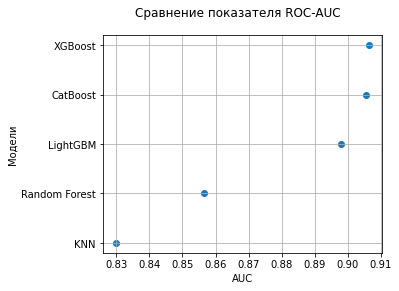

In [63]:
best_scores = {'KNN': knn_cv.best_score_, 'Random Forest': forest_cv.best_score_,
        'LightGBM': gbm_cv.best_score_, 'CatBoost': cat_cv.best_score_, 'XGBoost':clf_xgbc.best_score_}
names = list(best_scores.keys())
values = list(best_scores.values())

fig, axs = plt.subplots(1, figsize=(5, 4), sharey=True)
axs.scatter(values, names)
fig.suptitle('Сравнение показателя ROC-AUC')
axs.set_ylabel('Модели')
axs.set_xlabel('AUC')
axs.yaxis.grid(True)
axs.xaxis.grid(True)

Также построим график ROC кривой на примере тесовых данных для каждой из моделей.

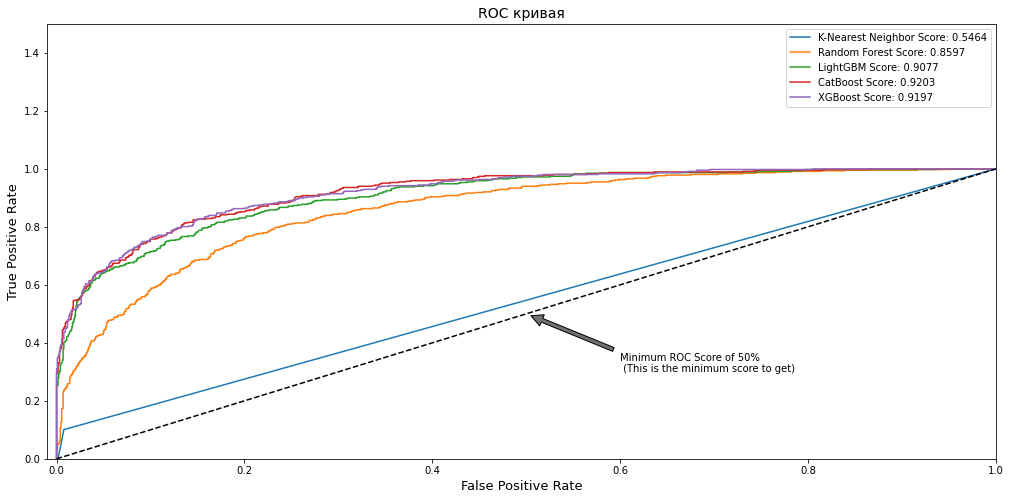

In [64]:
pred_proba_knn = knn_cv.predict_proba(X_test)
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_test, pred_proba_knn[:,1].ravel())
pred_proba_rfr = forest_cv.predict_proba(X_test)
rfr_fpr, rfr_tpr, rfr_thresold = roc_curve(y_test, pred_proba_rfr[:,1].ravel())
pred_proba_lxgb = gbm_cv.predict_proba(X_test)
lxgb_fpr, lxgb_tpr, lxgb_thresold = roc_curve(y_test, pred_proba_lxgb[:,1].ravel())
pred_proba_cat = cat_cv.predict_proba(X_test)
cat_fpr, cat_tpr, cat_thresold = roc_curve(y_test, pred_proba_cat[:,1].ravel())
pred_proba_xgbc = clf_xgbc.predict_proba(X_test)
xgbc_fpr, xgbc_tpr, xgbc_thresold = roc_curve(y_test, pred_proba_xgbc[:,1].ravel())

def graph_roc_curve_multiple(knn_fpr, knn_tpr, rfr_fpr, rfr_tpr, lxgb_fpr, 
                             lxgb_tpr, cat_fpr, cat_tpr, xgbc_fpr, xgbc_tpr):
    plt.figure(figsize=(17,8))
    plt.title('ROC кривая', fontsize=14)    
    plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbor Score: {:.4f}'.format(roc_auc_score
                                                                               (y_test, pred_proba_knn[:,1].ravel())))
    plt.plot(rfr_fpr, rfr_tpr, label='Random Forest Score: {:.4f}'.format(roc_auc_score
                                                                               (y_test, pred_proba_rfr[:,1].ravel())))
    plt.plot(lxgb_fpr, lxgb_tpr, label='LightGBM Score: {:.4f}'.format(roc_auc_score
                                                                               (y_test, pred_proba_lxgb[:,1].ravel())))
    plt.plot(cat_fpr, cat_tpr, label='CatBoost Score: {:.4f}'.format(roc_auc_score
                                                                               (y_test, pred_proba_cat[:,1].ravel())))
    plt.plot(xgbc_fpr, xgbc_tpr, label='XGBoost Score: {:.4f}'.format(roc_auc_score
                                                                               (y_test, pred_proba_xgbc[:,1].ravel())))
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1.5])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(knn_fpr, knn_tpr, rfr_fpr, rfr_tpr, lxgb_fpr, lxgb_tpr, cat_fpr, cat_tpr, xgbc_fpr, xgbc_tpr)
plt.show()

С минимальным разрывом лучшей оказалась модель CatBoost, однако, как и до этого, разница между критериями качества данной модели и модели XGBoost минимально.

Для определения лучшей итоговой модели обратимся ко второму критерию качества, который разрешил нам использовать заказчик  - accuracy score. Та модель, которая покажет более высокое значение данного критерия будет выбрана в качестве итоговой. 

In [65]:
print('Accuracy CatBoost на тренировочной выборке:', cross_val_score(
    cat, X_train, y_train, cv=3, scoring='accuracy').mean())
print('Accuracy XGBoost на тренировочной выборке:', cross_val_score(
    xgbc, X_train, y_train, cv=3, scoring='accuracy').mean())

Accuracy CatBoost на тренировочной выборке: 0.8525199826200677
[13:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:02:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc

Разница между критериями качества обоих моделей оказалась минималеной, однако XGBoost вновь показал себя несколько лучше - именно поэтому мы выбираем данную модель в качестве итоговой и приступаем к проверки модели на тестовых данных. 

Дополнительно после выбора итоговой модели построим график значимости признаков для нее.

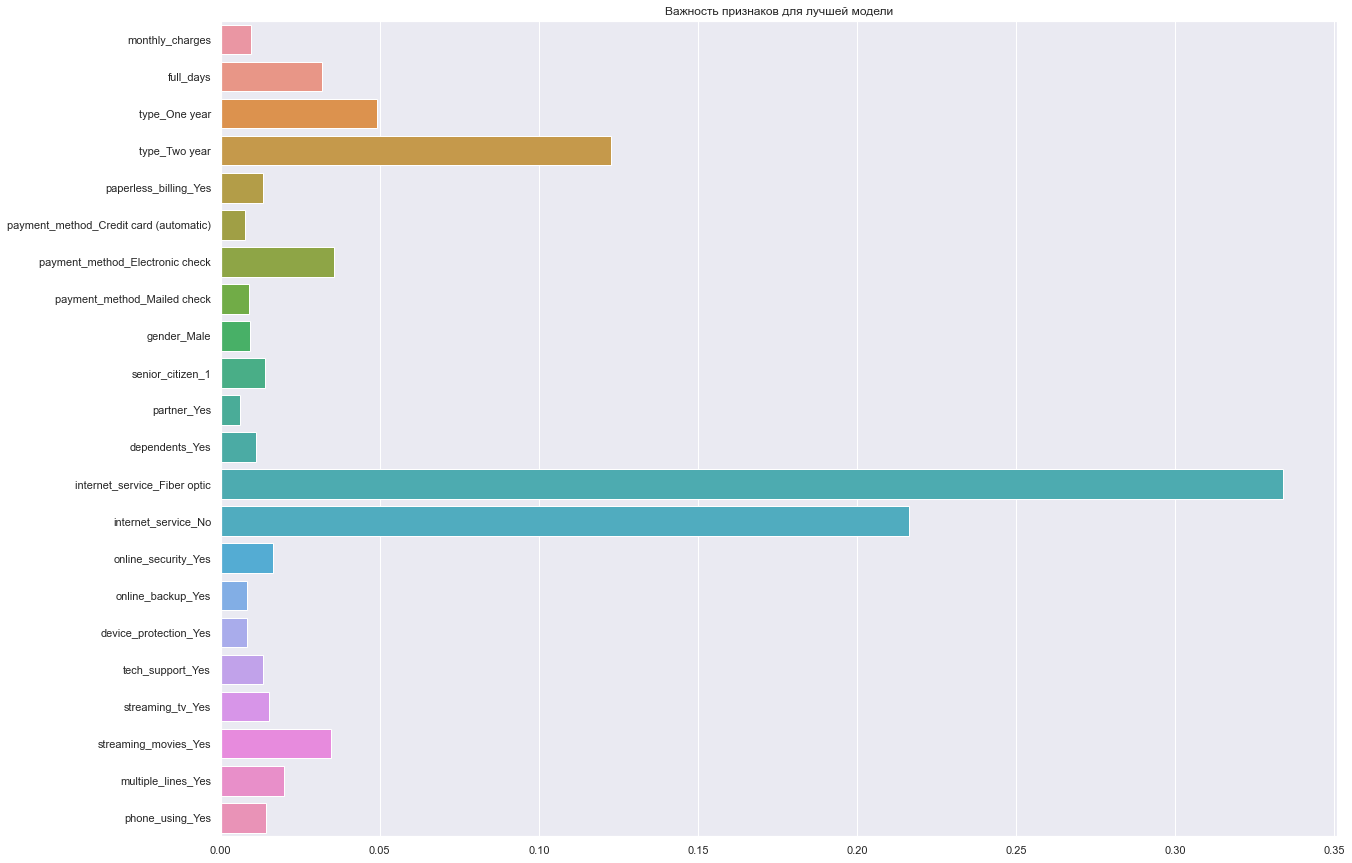

In [66]:
plt.figure(figsize=(20,15))
sns.set()
sns.barplot(x=xgbc.feature_importances_,y=X_train.columns)
plt.title('Важность признаков для лучшей модели')
plt.show()

### Проверка лучшей модели на тестовой выборке

Оценим качество нашей итоговой модели на тестовых данных.

In [67]:
test_pred_xgbc = clf_xgbc.predict_proba(X_test)[:,1]

print('Roc-Auc XGBoost на тестовой выборке:', roc_auc_score(y_test, test_pred_xgbc))

Roc-Auc XGBoost на тестовой выборке: 0.9196613260345061


Мы получили неплохое качество итоговой модели на тестовой выборке.  

## Итоговые выводы

Перед нами стояла задача создания модели машинного обучения, которая смогла бы предсказывать отток клиентов с целью его предотвращения. Исходно мы работали с 5 наборами данных, в которых содержались персональные данные клиентов, информация об их договорах и используемых услугах. 

Первичный анализ данных помог выявить основные особенности и проблемы в данных, а также разработать общий план дальнейшей работы на данным проектом. 

На этапе предобработки мы подготовили данные к дальнейшему анализу и моделированию: объединили исходные датафреймы в одни и заполнили образовавшиеся пропуски, создали дополнительные переменные и частично преобразовали имеющиеся.

На этапе исследовательского анализа мы более подробно изучили наши данные. В значениях таргета был обнаружен существенный дисбаланс, которые мы позднее учли при разбиении данных, а также на этапе моделирования. Также мы рассмотрели на распределение двух групп клиентов в рамках каждой из переменных: между разными группами для категориальных переменных и разницу медиан для непрерывных. Для каждой из переменных были сделаны соответствующие выводы о распределении групп. Наконец, мы оценили корреляцию между всеми нашими признаками. Это позволило предположить, какие именно переменные окажутся наиболее значимыми на этапе моделирования.

Наконец, на этапе моделирования мы вначале вновь занялись подготовкой данных: разбили данные на две выборки и провели кодирование части переменных. После мы подобрали наиболее оптимальные параметры для 5 моделей с целью максимизации ключевого параметра Roc-Auc. Мы рассмотрели следующие модели: модель k-ближайщих соседей, случайный лес, LightGBM, модель CatBoost и XGBoost. Лучшие результаты показали две последние модели - разрыв в значениях параметра качества был минимален. Для определения итоговой модели мы провели дополнительный тест - оценили качество двух моделей по второму критерию значимости accuracy. Значительный перевес в значении оказался у модели XGBoost. Именно ее мы выбрали в качестве итоговой модели.